# Meta-Progamming Skills and Debugging

## Introduction

Welcome to our last day of our python crash course. Today we will be going over some meta-programming skills that will be helpful as you continue to use python in your courses and research. We'll talk about how to read documentation and how to debug/troubleshoot. And then we'll put it to practice by working through more complex exercises. At the end of this session we will have time for freeform questions or to discuss other topics in python that you are interested in. As always, load the libraries by running the code block below to get started. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Learning to read documentation



**Programming effectively actually involves a lot of reading** 

Primarily documentation, but also code, google results, stackexchange queries, etc. These are just a few examples of what you'll read as you work on code. Reading the documentation of a package or library or software that you are using should probably be the first thing you do when you start using it. However, software docs pages are a much different sort of writing than we may be used to, if we're primarily used to reading journal articles, textbooks, and protocols. Knowing how and how much to read documentation is a skill that needs to be developed over time to suit your own needs. There's definitely no need to read every single page of documentation of a piece of software, especially for large libraries like `numpy` or `matplotlib`. 

**There are a variety of ways software can be documented** 

You may be handed a single script from a coleague to perform some action and that script may have **comments** in the code detailing what it does or what certain lines do. Individual functions may have what is called a **docstring**, which is a string that occurs immediately after the function definition detailing how do use that function, inputs, and outputs. Another type of documentation is a docs page or **API reference** on a website for that software, such as the page for the seaborn's [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function. Many software packages also have some introductory pages like **vignettes** or **tutorials** that guide you through the basics of the software. The [Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) of Pandas is a good example of this. 

**What documentation are we meant to read?** 

In general, documentation is meant to be a reference manual more than a textbook. A lot of documentation is really repetitive, because it has to exhaustively cover every single function and class available to the user. I do not recommend reading documentation like a book or in any linear way. That's like learning a foreign language by reding the dictionary. For example, `numpy` has a variety of [mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html), but you are not required to look at the doc page of each of those. It is enough to know that it exists and when you do want to use a particular one, to check the page of that specific function. The most important parts of the documentation to read first are the tutorials/user guides, which introduce the basic functionality of the software with some example code. Often times, this code is exactly what you need to get started. If you get stuck, then it's time to read the docs pages for the specific commands you are using.

### Anatomy of a docs page

Scientific articles typically have the same sections: Introduction, Methods, Results/Discussion. Similarly, docs pages for a function should all have some common components:

* Function name and how to call it
    * parameters in parentheses with any defaults showing
    * positional parameters first, keyword parameters after asterisk
* Description of function
* Detailed parameters that can be passed to each function
    * type of object that can be passed
    * description of what the parameter does
* Returns
    * type of object(s) returned
    * description of the object
* Examples

**Just the basics**

If this is your first time encountering the function, glance at the function name and description and then go directly to the examples. This will help you understand if this function does what you think it does and give you a template to use it. 


>**Exercise:** Read the documentation page for plotting pie charts in matplotlib [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html). What is the minimal information you need to pass to the function to get a pie chart? What parameters are optional or already have defaults?


**Troubleshooting**

Looking at a docs page is helpful for troubleshooting certain errors. 

>**Exercise:** Below is some code that is meant to plot a pie chart. However, it's not working. Can you figure out what's wrong? 

Text(0.5, 1.0, 'Programming Language Popularity')

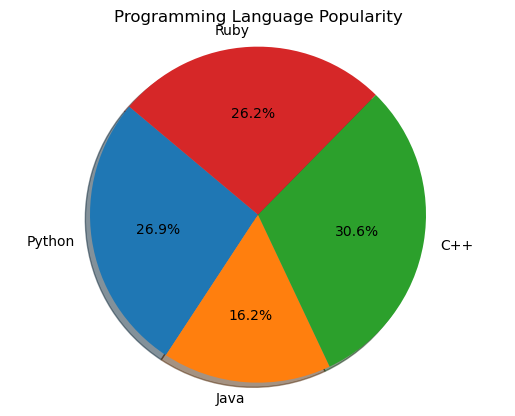

In [5]:
labels = ['Python', 'Java', 'C++', 'Ruby']
sizes = [215, 130, 245, 210]

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

# Aspect ratio to ensure the pie chart is circular.
ax.axis('equal')  

ax.set_title('Programming Language Popularity')

**Exploring**

If you are trying to find a specific way to customize the pie chart, it is worth reading the entire list of parameters to see what options are available.

>**Discussion:** Read the pie plot function's [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html) page. How does the function give you control over the look of your pie wedges?

>**Discussion:** What questions do you still have about the documentation page or about the pie function after reading it?

## Learning to read code

Learning to read other people's code is an important skill. Just like writing, everybody has their own coding style and when we learn to read and edit other people's code, it's mutually beneficial. Some things I've learned from reading other's code:

* More efficient ways to do things
* Common mistakes to avoid
* New error messages and bugs
* New problem solving strategies
* How to write more readable/reproducible code
* etc.

Below is a python script, reproduced from FASRC's [User Codes GitHub repo](https://github.com/fasrc/User_Codes), which is an underrated resource for anyone looking to run things on the Cannon high performance computer cluster. The script is called mc_pi.py and it calculates the value of pi via the monte-carlo method.

```python
"""
Program: mc_pi.py
         Monte-Carlo calculation of PI
"""
import random

N = 100000

pi = 3.1415926535897932

count = 0
for i in range(N):
    x = random.random()
    y = random.random()
    z = x*x + y*y
    if z <= 1.0:
        count = count + 1

PI = 4.0*count/N

print( "Exact value of PI: {0:7.5f}".format(pi) )
print( "Estimate of PI: {0:7.5f}".format(PI) )
```

>**Discussion:** Can you describe in words what this script is doing? What extra information do you need to understand this script? **Note:** if the math behind this algorithm is not clear to you, you can find some explanations if you search for something like "MCMC algorithm for estimating pi."

>**Exercise:** The above python code uses a for loop to iterate over 100,000 values. This is rather slow. Rewrite this code to use numpy's [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) function and take advantage of speedy array operations. If possible, make this into a function called `mc_pi` that takes as argument N, the number of simulations. 

In [6]:
# Your code here

def mc_pi(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    pi_estimate = 4 * np.sum(x**2 + y**2 < 1) / N
    print("Exact value of pi: {0:7.5f}".format(np.pi))
    print("Estimate of pi: {0:7.5f}".format(pi_estimate))
    return pi_estimate

In [7]:
# Test your code
mc_pi(100000)

Exact value of pi: 3.14159
Estimate of pi: 3.13388


3.13388

>**Exercise:** Here is another example of someone elses's code that plots Boston's weather data. Can you annotate each chunk to describe what it does? Feel free to remove or adjust lines of the code and replay the block to see what each line does. 

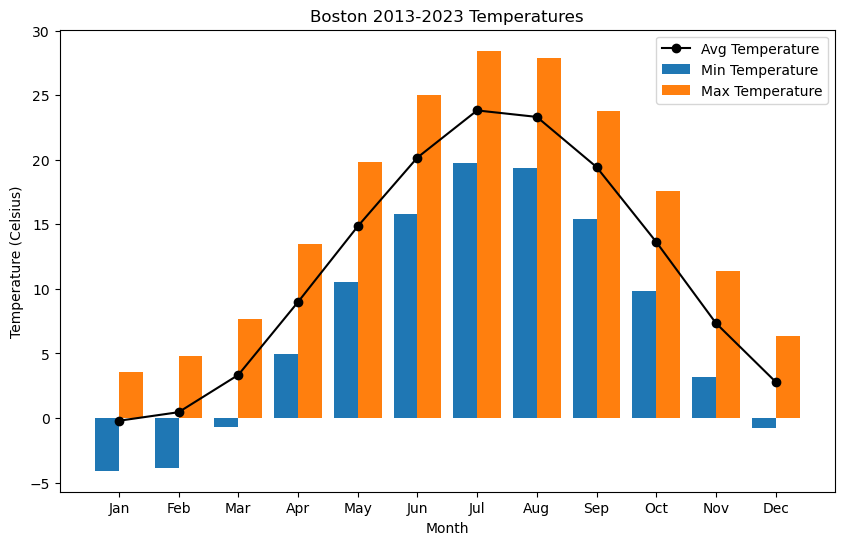

In [8]:
df = pd.read_csv('https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/boston_weather_data.csv')

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['month_name'] = df['time'].dt.strftime('%b')

df_monthly_mean = df[['year', 'month', 'month_name', 'tavg', 'tmin', 'tmax']].groupby(['month', 'month_name']).mean(numeric_only=True).reset_index()

df_long = df_monthly_mean.melt(id_vars=['month', 'month_name'], value_vars=['tmin','tmax'], var_name='temperature_type', value_name='Temperature')

fig, ax = plt.subplots(figsize=(10, 6))

tmin_data = df_long[df_long['temperature_type'] == 'tmin']
tmax_data = df_long[df_long['temperature_type'] == 'tmax']

ax.bar(tmin_data['month'] - 0.2, tmin_data['Temperature'], width=0.4, label='Min Temperature')
ax.bar(tmax_data['month'] + 0.2, tmax_data['Temperature'], width=0.4, label='Max Temperature')

ax.plot(df_monthly_mean['month'], df_monthly_mean['tavg'], marker='o', label='Avg Temperature', color='black')

ax.set_xticks(df_monthly_mean['month'])
ax.set_xticklabels(df_monthly_mean['month_name'])
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (Celsius)")
ax.set_title("Boston 2013-2023 Temperatures")
ax.legend()

>**Discussion:** What did you learn about pandas or plotting from reading this code? 

## How to get unstuck: troubleshooting/debugging

In this section, we're going to be talking about debugging code. We typically picture debugging as something that happens when you run something and there's an error message. However, there are many other reasons why we might want to take a closer look at our code and the tips here will be useful throughout the code-writing process. 

### Manual debugging

Here are some steps to figure out what's wrong that just involve using your own brain. This is usually my first resort as it is quick and many issues end up being about a simple typo or missing step. 

* Read the error message
    * What line does it refer to?
    * What state should the code be in at that point?
* (Re)Read your code
    * Explain it line by line to another person or an inanimate object
* Add error checks
    * Print messages to check variables and progress
    * Peel back layers and test each layer (e.g. test each function)
* Get another pair of eyes to look at it

### Tests

A very helpful approach to debugging - and, indeed, writing code in general - is to have some small input data that you can use to test. Ideally this should be something that runs fast and where you know what the expected output is. While this won't necessarily help you fix problems that cause your code to simply not execute, it can be extremely useful if you are not certain of how to program something. 

For example, if you have a dataset that you have manually processed, but now want to automate with a Python script or set of scripts, you will very likely want to check your code by running it against a test input that has a known output. 

This is particularly important if you are going to use LLMs for debugging, as discussed below. LLMs rarely make syntax errors, but do make logic errors.

### Using the internet

StackExchange-type websites are great resources for learning about the code or software you are running. These answers are what the LLMs are trained on so while it may be less convenient to read through a stackexchange answer, you will get more correct information and also more context than asking an LLM the same thing. You'll probably land on a stackexchange website if you've googled an error message or the name of your software plus some issue. Lots of people have asked lots of questions over the years and you can often find someone who has had the same problem as you.

Even if you don't find the exact answer to your question, it's helpful to read about and participate in the community of people who use the same software as you. So don't be shy about posting something if you need specific advice. I've found that the Biostars community is fairly friendly.

Here are some examples of questions on Biostars that I found were more helpful or interesting than what an LLM might produce:

* [How To Efficiently Parse A Huge Fastq File?](https://www.biostars.org/p/10353/)
* [Mean Length of Fasta Sequences](https://www.biostars.org/p/1758/)
* [Why Don't We Use Binary Format [For storing DNA data]?](https://www.biostars.org/p/75178/)

### Asking for help

Often times, the quickest way to get unstuck is to ask someone for help. There are some steps you can take to make it easier for others to help you. You may know all the context of your code, but a friend or one of us at office hours is going in fresh. Here's some information that you should provide when asking for help (in approximate order of effort):

1. Error message
2. What you expected to happen
3. What is the command you used
4. Your environment/context
5. A minimal reproducible example

Numbers 1 through 3 are the bare minimum information, while 4 and 5 are helpful for trickier problems. Number 5 is especially important if you are asking for help in an asynchronous way, like on a forum or in an email. This allows the person helping you to run code to see the error message for themselves and test out solutions before getting back to you. 

If you're not familiar with **minimal reproducible examples**, it's a way to pare down your code to the smallest amount that still produces the error. Often in the process of doing this, you will find the error yourself. How to make a reproducible example (AKA **reprex**)? Here are some steps:

1. Start with a fresh script
2. Import only the libraries you need
3. Create only the data objects/variables you need (You may need to generate data or subset your data if it's large)
4. Write only the code that produces the error
5. Annotate the code with comments to explain what you are trying to do

If you want to then share this code (and the dummy data!) with someone else, you can either send the script to them or you can use a python package called `reprexpy`, which will format both your code and your output in a way that is easy to post in plain text online or in an email. For more information see the docs for [reprexpy](https://reprexpy.readthedocs.io/en/latest/).  

### Using LLMs to debug code

Here are some ways you can use LLMs to fix code:

* Use a chat-based LLM
* Use GitHub Copilot plugin for VSCode

Using LLMs to fix code is similar to asking a person for help: you want to include the context of the error as much as possible. If your LLM is integrated into your code editor, it can be as simple as highlighting the section and telling it what you expect the code to do. 

## Error messages (also known as exceptions)

In python, there are a few types of error messages that you might encounter. Here are some common ones:

- `SyntaxError`: You have a typo like a missing parenthesis or bracket
- `NameError`: You are trying to use a variable that hasn't been defined
- `TypeError`: You are trying to use a variable in a way that is not allowed
- `ValueError`: You are trying to use a variable with a value that is not allowed
- `IndexError`: You are trying to access an index that doesn't exist
- `KeyError`: You are trying to access a key that doesn't exist
- `AttributeError`: You are trying to access an attribute that doesn't exist

Look for these keywords in the error message to help you figure out what's wrong.

### Exception Handling

Exception handling is a fundamental concept in Python that allows you to manage and respond to errors gracefully, ensuring that a program can continue running or fail in a controlled manner. When your code encounters an issue—such as trying to divide by zero, accessing a file that doesn't exist, or converting user input to the wrong type—Python raises an "exception." Without proper handling, these exceptions can (and usually do) cause your program to crash, or worse create unpredictable bugs. By using try and except blocks, you can anticipate potential errors, catch these exceptions, and define alternative actions or informative messages for the user. 

As an example, here is a simple function that calcutes the log2 fold change, that is log2(x/y). We will write this naively, and then see what errors we get with different inputs.

In [9]:
import math

def log2fc(x, y):
    return math.log2(x/y)

In [10]:
log2fc(0,0)

ZeroDivisionError: division by zero

In [11]:
log2fc(10,0)

ZeroDivisionError: division by zero

In [12]:
log2fc(0,10)

ValueError: math domain error

In [13]:
log2fc("a", "b")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

We see that there are three kinds of errors here, that we might want to handle. The first is a "ZeroDivisionError", when we try to divide by 0. The second is a ValueError, since the math.log2 function does not like returning -Inf for log2(0), and in our function we probably don't want that either. The last is a TypeError if we give inputs that don't have division methods (e.g., strings).

For any error, we can "catch" the error with a try-except statement, which has the following basic form:

```
try:
    code to try goes here
except ErrorType:
    code to run if try block generates ErrorType goes here
```

A few things to note:

- Specifying Error Types: You don't need to specify an error type; if you don't, the except block will catch any error. Normally, this isn't a good idea because you might want to return specific messages or handle particular error types differently.
- Multiple Except Blocks: except statements function somewhat like elif: you can have many of them, each with a different ErrorType. You can also list multiple error types within a single except statement using parentheses, e.g., `except (KeyError, ValueError):` if you want to catch both errors.
- Else and Finally Blocks: You can have an `else` block (which runs only if no errors occur) or a `finally` block (which runs after the try-except regardless of whether an error occurred).

Below is a slightly improved version of our function, that catches TypeErrors. Can you modify this to also catch ZeroDivisionError? If we get that error, let's adjust the denominator to y = y + (x/10) and recalculate. For a bigger challenge, think about how you might also catch ValueErrors. Note that these are coming from the `math.log2(ratio)` not `ratio = x/y`. 

In [14]:
def log2fc(x, y):
    try:
        ratio = x/y
    except TypeError:
        print("Error: x and y must be numbers")
        return None
    
    return math.log2(ratio)

>**Exercise:** Modify the above function to also catch ZeroDivisionError and ValueError.

In [15]:
# Your code here
def log2fc(x, y):
    try:
        ratio = x/y
    except ZeroDivisionError:
        y_adj = y + (x/10)
        ratio = x/y_adj
        print(f"Warning: y was 0, correcting to {y_adj}")
    except TypeError:
        print("Error: x and y must be numbers")
        return None
    
    try: 
        return math.log2(ratio)
    except ValueError:
        print(f"Error: log2({ratio}) is undefined, using 0")
        return 0

>**Exercise:** write a function that takes a DataFrame and a column, and returns the average of that column. If you can't take the mean of the column, print an informative error message and return `None`.
The wine dataset is a good test case for this: use the following code to load the wine dataset as a pandas DataFrame, and also create a test dataset with errors.

In [16]:
wines = pd.read_csv('https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/winequality-red.csv', delimiter=';')
wines_error = wines.copy()
# Make a few columns be non-numeric
wines_error['alcohol'] = np.random.choice(['high', 'medium', 'low'], len(wines))
wines_error['quality'] = np.random.choice(['excellent', 'good', 'meh', 'bad'], len(wines))

In [17]:
# Your code here
def analyze_wines(df, column): # keep
    """Compute and print the mean of a DataFrame column."""
    data = df[column]
    try:
        mean = data.mean()
    except TypeError:
        print(f"Error: could not calculate mean for {column}")
        mean = None
    else:
        print(f"Mean of {column}: {mean}")
    return mean

In [18]:
# Test your code here
analyze_wines(wines, 'alcohol')
analyze_wines(wines_error, 'alcohol')

Mean of alcohol: 10.422983114446529
Error: could not calculate mean for alcohol


-------

## iNaturalist Data exercise

This exercise will work with the iNaturalist bird data from 2023 Massachusetts. The individual bird observations are stored in a file called `bird_observations.csv` and the mapping of bird taxon ids to common names is stored in a file called `bird_names.csv. We've previously imported both as dictionaries and recorded the number of observations of each bird. 

This time, we will ask you to **find the most common bird sighting for each month and print a dataframe with the month, the bird name, and the number of sightings**

Here are some handy functions/methods you might find useful. You may or may not use all of these. 

| Function | Description |
| --- | --- |
| `pd.read_csv()` | Read a csv file into a DataFrame |
| `pd.merge()` | Merge two DataFrames together |
| `pd.to_datetime()` | Convert a column to datetime |
| `.dt.month` | Extract the month from a datetime column |
| `.groupby()` | Group the DataFrame by a column |
| `.size()` | Count the number of observations in each group |
| `.transform()` | Perform group-wise calculations while preserving DataFrame shape |
| `.loc[]` | Select rows and columns by index |
| `.reset_index()` | Reset the index of a DataFrame (make the index into a column)|
| `.merge()` | Merge two DataFrames together |
| `.query()` | Query the columns of a DataFrame with a boolean expression |

In [19]:
filename = 'data/bird_names.csv'

bird_names = pd.read_csv(filename, header=None, names=["scientific_name", "common_name", "taxon_id"], dtype={"taxon_id": str})

bird_names

,scientific_name,common_name,taxon_id
0,Anas rubripes,American Black Duck,6924
1,Fulica americana,American Coot,473
2,Spinus tristis,American Goldfinch,145310
3,Falco sparverius,American Kestrel,4665
4,Turdus migratorius,American Robin,12727
...,...,...,...
101,Meleagris gallopavo,Wild Turkey,906
102,Aix sponsa,Wood Duck,7107
103,Setophaga petechia,Yellow Warbler,145238
104,Sphyrapicus varius,Yellow-bellied Sapsucker,18463


In [20]:
filename = 'data/bird_observations.csv'

bird_observations = pd.read_csv(filename, dtype={"taxon_id": str}, parse_dates=["time_observed_at"])
bird_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                1277 non-null   int64              
 1   time_observed_at  1274 non-null   datetime64[ns, UTC]
 2   taxon_id          1277 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 30.1+ KB


In [21]:
bird_observations = bird_observations.merge(bird_names, on='taxon_id', how="left")

In [22]:
bird_observations

,id,time_observed_at,taxon_id,scientific_name,common_name
0,145591043,2023-01-01 17:33:31+00:00,14886,Mimus polyglottos,Northern Mockingbird
1,145610149,2023-01-01 20:55:00+00:00,7004,Mergus merganser,Common Merganser
2,145610383,2023-01-01 21:13:00+00:00,6993,Bucephala albeola,Bufflehead
3,145611915,2023-01-01 21:12:00+00:00,13858,Passer domesticus,House Sparrow
4,145611916,2023-01-01 21:08:00+00:00,14850,Sturnus vulgaris,European Starling
...,...,...,...,...,...
1272,225232542,2023-04-01 18:48:21+00:00,906,Meleagris gallopavo,Wild Turkey
1273,227003497,2023-09-23 11:05:55+00:00,906,Meleagris gallopavo,Wild Turkey
1274,228884693,2023-04-03 21:50:08+00:00,7089,Branta canadensis,Canada Goose
1275,238536518,2023-08-24 12:11:00+00:00,8229,Cyanocitta cristata,Blue Jay


In [23]:
bird_observations['month'] = bird_observations["time_observed_at"].dt.month

# monthly counts
monthly_counts = bird_observations.groupby(['month', 'common_name']).size().reset_index(name='count')

# get the maximum count for each month
monthly_counts['max_count'] = monthly_counts.groupby('month')['count'].transform('max')

# check the results
print(monthly_counts.head())

# use max_counts to filter the top counts within each month
monthly_counts.query('count == max_count').drop('max_count', axis=1)



   month             common_name  count  max_count
0    1.0     American Black Duck      1          9
1    1.0          American Robin      6          9
2    1.0              Bald Eagle      2          9
3    1.0       Belted Kingfisher      1          9
4    1.0  Black-capped Chickadee      3          9


,month,common_name,count
24,1.0,House Sparrow,9
53,2.0,Domestic Greylag Goose,9
90,3.0,Canada Goose,11
122,3.0,Wild Turkey,11
123,4.0,American Robin,28
168,5.0,American Robin,15
205,6.0,American Robin,19
245,7.0,Blue Jay,10
272,8.0,American Goldfinch,9
308,9.0,Canada Goose,43


----

## Creating summary statistics and correlations of the RNA-seq data set

In this exercise, we will create a dataframe that contains the mean and standard deviation of all the genes in the RNA-seq dataset. We will also calculate the correlation between the TPM values of each sample. First, here is the code to load the data into a pandas dataframe. 

In [24]:
samplesDict = {
    "AC_1873_20908": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/A01v1_20908_bl_S1_L003_abundance.tsv",
    "AW_366493": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/B03v1_366493_h_S18_L003_abundance.tsv",
    "AW_366490": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E06v1_366490_g_S45_L003_abundance.tsv",
    "AW_366494": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E07v1_366494_br_S53_L003_abundance.tsv",
    "AW_365335": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E08v1_365335_e_S61_L003_abundance.tsv"
}

def makePandasDF(sampleID,samplePath):
    df = pd.read_csv(samplePath, sep='\t') #read the tab-separated file as a Pandas dataframe
    df = df.rename(columns={'target_id': 'transcriptID', 'tpm': f"{sampleID}_tpm"}) #renaming two columns for clarity/ease of use later
    keepColumns = ['transcriptID', f"{sampleID}_tpm"] #making a list of the columns we want to retain
    dfSimple = df[keepColumns] #subset the dataframe to only be the two desired columns
    return dfSimple #return the simplified data frame

pandasDFs = []

for sample in samplesDict:
    filePath = samplesDict[sample]
    pandasDFs.append(makePandasDF(sample,filePath))

# making the base dataframe to merge onto
mergedDF = pandasDFs[0]

for df in pandasDFs[1:]:
    mergedDF = pd.merge(mergedDF, df, on='transcriptID')

gene_df = pd.read_csv("https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/geneIDs.tsv", sep='\t', header=None, names=['transcriptID', 'geneID'])
mergedDF = pd.merge(mergedDF, gene_df, on='transcriptID')


In [25]:
mergedDF.head(5)

,transcriptID,AC_1873_20908_tpm,AW_366493_tpm,AW_366490_tpm,AW_366494_tpm,AW_365335_tpm,geneID
0,TCONS_00000001,0.0,1.82628,0.000000,4.534810,2.620970,gene-SNX18_gGal-2
1,TCONS_00000002,0.0,30.01240,0.146875,47.794500,53.964900,gene-LOC116806879_tGut-like-2
2,TCONS_00000003,0.0,0.00000,0.000000,0.000000,0.000000,gene-KCMF1_gGal-like-1
3,TCONS_00000004,0.0,2.63508,0.000000,1.196400,1.136450,gene-KCMF1_gGal-like-1
4,TCONS_00000131,0.0,6.84775,0.000000,0.124533,0.525385,gene-NTRK2_tGut-1


Now that we have our final dataframe that summarizes expression information for our 5 samples, we can start to pull useful information out of it! Let's consider the sorts of information we could want from such a dataset.

>**Exercise:** For each sample in our dataset, we want to calculate the mean expression across all transcripts...in other words, we want the mean of each of our sample columns. Make sure you are correctly using the index to pull out the desired columns, then use the `.mean()` function.

In [26]:
# Your code here
mergedDF.loc[:, 'AC_1873_20908_tpm':'AW_365335_tpm'].mean()

# using filter
mergedDF.filter(like='_tpm').mean()

AC_1873_20908_tpm     0.036272
AW_366493_tpm        60.665149
AW_366490_tpm         0.035093
AW_366494_tpm        24.312443
AW_365335_tpm        34.848728
dtype: float64

>Exercise: For each transcript (i.e. each row), we want to calculate the mean expression and the standard deviation, and add those both as columns to your data frame. In other words, we want to end up with something like this:

| transID   | sample1_TPM | sample2_TPM | sample3_TPM | sample4_TPM | sample5_TPM | geneID | meanTPM | meanSTD |
|-----------|-------------|-------------|-------------|-------------|-------------|--------|---------|---------|
| TCONS_01  | 0           | 0           | 1.2         | 5           | 3           | gene1  | x       | x       |
| TCONS_02  | 21.4        | 12.3        | 10.0        | 0           | 9.3         | gene1  | y       | y       |
| TCONS_03  | 3.3         | 0.12        | 0           | 0           | 4.7         | gene2  | z       | z       |
| Etc. etc. |             |             |             |             |             |        |         |         |

Some things to consider:
- As before, we don't want the ENTIRE row (as certain columns contain non-numerical info, e.g. gene name), just the range of columns with TPM info 
- Remember numpy has handy built-in function for mean and STD...also remember the useful 'axis' argument
- To add a new column to a pandas dataframe, the syntax is quite simple: `df['name_for_new_column'] = some_1D_array`

In [27]:
# Your code here

mergedDF['meanTPM'] = mergedDF.loc[:, 'AC_1873_20908_tpm':'AW_365335_tpm'].mean(axis=1)
mergedDF['STD'] = mergedDF.loc[:, 'AC_1873_20908_tpm':'AW_365335_tpm'].std(axis=1)

mergedDF.head()

,transcriptID,AC_1873_20908_tpm,AW_366493_tpm,AW_366490_tpm,AW_366494_tpm,AW_365335_tpm,geneID,meanTPM,STD
0,TCONS_00000001,0.0,1.82628,0.000000,4.534810,2.620970,gene-SNX18_gGal-2,1.796412,1.912708
1,TCONS_00000002,0.0,30.01240,0.146875,47.794500,53.964900,gene-LOC116806879_tGut-like-2,26.383735,25.577251
2,TCONS_00000003,0.0,0.00000,0.000000,0.000000,0.000000,gene-KCMF1_gGal-like-1,0.000000,0.000000
3,TCONS_00000004,0.0,2.63508,0.000000,1.196400,1.136450,gene-KCMF1_gGal-like-1,0.993586,1.087482
4,TCONS_00000131,0.0,6.84775,0.000000,0.124533,0.525385,gene-NTRK2_tGut-1,1.499534,2.997508


### Grouping data in a pandas dataframe
So far, when summarizing the data in our dataframe we've considered the most basic instances where we want to group down columns or across rows. However, we can use pandas to define our own groups and do more complex analysis!
First, let's do a quick test of our understanding to make sure we understand our data:


In [28]:
mergedDF.head()

,transcriptID,AC_1873_20908_tpm,AW_366493_tpm,AW_366490_tpm,AW_366494_tpm,AW_365335_tpm,geneID,meanTPM,STD
0,TCONS_00000001,0.0,1.82628,0.000000,4.534810,2.620970,gene-SNX18_gGal-2,1.796412,1.912708
1,TCONS_00000002,0.0,30.01240,0.146875,47.794500,53.964900,gene-LOC116806879_tGut-like-2,26.383735,25.577251
2,TCONS_00000003,0.0,0.00000,0.000000,0.000000,0.000000,gene-KCMF1_gGal-like-1,0.000000,0.000000
3,TCONS_00000004,0.0,2.63508,0.000000,1.196400,1.136450,gene-KCMF1_gGal-like-1,0.993586,1.087482
4,TCONS_00000131,0.0,6.84775,0.000000,0.124533,0.525385,gene-NTRK2_tGut-1,1.499534,2.997508


We can see that the transcript IDs have unique values, but there are duplicates in the gene ID column; why is this? Is this a problem?

>! Answer: no, it is expected! Genes can have *multiple transcripts*, i.e. genes have multiple isoforms. So while each transcript ID should be unique, it is totally fine to have dupliucate gene IDs. 

SO: let's say that we now want information on a *per-gene* basis. For example, say we want to know how many isoforms each gene has. To accomplish this, we can use pandas' `groupby()` function, which splits a dataframe and groups it based on a *specified label*. In our case, we want to group based on gene ID, then pair it with the `size()` function to count how large each group is, i.e. how many isoforms a gene has:

In [29]:
mergedDF.groupby('geneID').size()

geneID
gene-APBA1_tGut-2                3
gene-ARRDC3_gGal-2               1
gene-ATP5F1AW_gGal-like-2        3
gene-C18orf32_gGal-1             1
gene-CDC37L1_gGal-2              2
gene-CTIF_tGut-2                 9
gene-FEM1C_tGut-like-2           1
gene-GNAQ_gGal-1                 2
gene-HINT1_tGut-like-1           5
gene-HINT1_tGut-like-2           3
gene-HINT1_tGut-like-3           7
gene-HINT1_tGut-like-5           6
gene-HINT1_tGut-like-6           4
gene-HINT1_tGut-like-7           6
gene-HINT1_tGut-like-8           4
gene-HINT1_tGut-like-9           5
gene-HOMER1_tGut-2               1
gene-KCMF1_gGal-like-1           2
gene-KIF2A_gGal-2                2
gene-KIF2A_tGut-like-1           3
gene-LOC100189940_tGut-like-2    2
gene-LOC100189940_tGut-like-3    1
gene-LOC100189940_tGut-like-4    2
gene-LOC100189940_tGut-like-5    3
gene-LOC100857579_gGal-like-2    1
gene-LOC116806757_tGut-like-1    1
gene-LOC116806879_tGut-like-2    1
gene-MACIR_gGal-2                1
gene-NTRK2_tG

This returns a 1D pandas Series, which you can convert back to a dataframe by using the `.reset_index()` function.

In [30]:
mergedDF.groupby('geneID').size().reset_index(name='count')

,geneID,count
0,gene-APBA1_tGut-2,3
1,gene-ARRDC3_gGal-2,1
2,gene-ATP5F1AW_gGal-like-2,3
3,gene-C18orf32_gGal-1,1
4,gene-CDC37L1_gGal-2,2
5,gene-CTIF_tGut-2,9
6,gene-FEM1C_tGut-like-2,1
7,gene-GNAQ_gGal-1,2
8,gene-HINT1_tGut-like-1,5
9,gene-HINT1_tGut-like-2,3


>**Exercise:** Add a column to the `mergedDF` dataframe that has the number of isoforms for the given gene.

In [31]:
# your code here

mergedDF['isoform_count'] = mergedDF.groupby('geneID')['geneID'].transform('count')
mergedDF.head()

,transcriptID,AC_1873_20908_tpm,AW_366493_tpm,AW_366490_tpm,AW_366494_tpm,AW_365335_tpm,geneID,meanTPM,STD,isoform_count
0,TCONS_00000001,0.0,1.82628,0.000000,4.534810,2.620970,gene-SNX18_gGal-2,1.796412,1.912708,1
1,TCONS_00000002,0.0,30.01240,0.146875,47.794500,53.964900,gene-LOC116806879_tGut-like-2,26.383735,25.577251,1
2,TCONS_00000003,0.0,0.00000,0.000000,0.000000,0.000000,gene-KCMF1_gGal-like-1,0.000000,0.000000,2
3,TCONS_00000004,0.0,2.63508,0.000000,1.196400,1.136450,gene-KCMF1_gGal-like-1,0.993586,1.087482,2
4,TCONS_00000131,0.0,6.84775,0.000000,0.124533,0.525385,gene-NTRK2_tGut-1,1.499534,2.997508,1


TPMs or transcripts per million are a useful way for summarizing expression levels for features of interest, whether they be of alternative spliced transcripts of a gene (i.e. isoforms) or the aggregated gene-level expression summed across all annotated isoforms. Kallisto generates isoform-level expression estimates, but it is often of interest to calculate gene-level expression. For a study of scrubjays gene expression, we have tables of isoform-level expression in the form of TPM for several samples. We also have a table that indicates which gene an isoform originates from. We've already merged those together as `mergedDF`. 

Use pandas `groupby`, `sum`, and perhaps other functions to create a single table where there is a column for gene id, and a separate column for each sample that represents the sum of TPM across all isoforms of a gene. Then, calculate all pairwise correlation coefficients (`.corr()` on your dataframe) between the tpm columns to see how strongly pairs of samples are correlated in their expression levels across genes.

You should end up with a table that looks like this:


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>AC_1873_20908_tpm</th>
      <th>AW_366493_tpm</th>
      <th>AW_366490_tpm</th>
      <th>AW_366494_tpm</th>
      <th>AW_365335_tpm</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>AC_1873_20908_tpm</th>
      <td>1.000000</td>
      <td>0.040025</td>
      <td>0.394478</td>
      <td>0.040464</td>
      <td>0.093961</td>
    </tr>
    <tr>
      <th>AW_366493_tpm</th>
      <td>0.040025</td>
      <td>1.000000</td>
      <td>-0.111748</td>
      <td>0.821287</td>
      <td>0.825275</td>
    </tr>
    <tr>
      <th>AW_366490_tpm</th>
      <td>0.394478</td>
      <td>-0.111748</td>
      <td>1.000000</td>
      <td>-0.082210</td>
      <td>-0.080825</td>
    </tr>
    <tr>
      <th>AW_366494_tpm</th>
      <td>0.040464</td>
      <td>0.821287</td>
      <td>-0.082210</td>
      <td>1.000000</td>
      <td>0.931355</td>
    </tr>
    <tr>
      <th>AW_365335_tpm</th>
      <td>0.093961</td>
      <td>0.825275</td>
      <td>-0.080825</td>
      <td>0.931355</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div> 



In [32]:
# Your code here

# list comprehension solution
grouped_by_gene = mergedDF.groupby(['geneID'])[[col for col in mergedDF.columns if 'tpm' in col]].sum()

# filter solution, probably a little easier to read but note reversed order of sum and filter, because the GroupBy filter method is different from the DataFrame filter method
grouped_by_gene = mergedDF.groupby(['geneID']).sum().filter(regex="tpm")

grouped_by_gene.corr()

,AC_1873_20908_tpm,AW_366493_tpm,AW_366490_tpm,AW_366494_tpm,AW_365335_tpm
AC_1873_20908_tpm,1.000000,0.040025,0.394478,0.040464,0.093961
AW_366493_tpm,0.040025,1.000000,-0.111748,0.821287,0.825275
AW_366490_tpm,0.394478,-0.111748,1.000000,-0.082210,-0.080825
AW_366494_tpm,0.040464,0.821287,-0.082210,1.000000,0.931355
AW_365335_tpm,0.093961,0.825275,-0.080825,0.931355,1.000000


-------

## Writing a function to calculate the logfold change of the RNA-seq dataset

In this exercise, we will be working with the kallisto output files. We will write a function that takes as input a gene symbol, like `KCMF1`, and optionally an individual. We will then do the following:
- Extract all rows of the kallisto DataFrame where the gene columns contain the gene symbol text
- Group the DataFrame by the exact text in the geneID column
- Sum the expression across transcripts to create a gene expression level
- Calculate the mean of the gene expression for AW individuals
- Calculate the log2 fold change with respect to the specified individual (e.g., log2(mean AW / AC))
- For each gene that matches that symbol, print out the geneID, the mean, and the log2 fold change.

The output should be something like:
```
geneID: gene-KCMF1_gGal-like-1; mean AW exp: 25.2; log2 fold change (mean AW / {input_individual}): 100.3
```

You can be as fancy as you like, but make sure to do a few things:
- If the gene symbol is not found in the data frame, make sure to catch that error and report "No transcripts matching {input_gene} found!" or something similar.
- If the individual is not found in the data frame, catch that error and report "Invalid reference individual {ref_individual}" or something similar.
- Catch numerical errors in the log2 calculations

In some cases you might want to raise specific errors, e.g. you can use: 
```python
if matching_rows.empty:
    raise ValueError(f"No transcripts matching {gene_symbol} found!")
```
to raise your own ValueError when you don't find any transcripts matching the gene symbol (although, of course, make sure to do this in a try-except block where the ValueError can be caught!)


First, let's re-run the code to get the `mergedDF` dataframe.

In [33]:
samplesDict = {
    "AC_1873_20908": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/A01v1_20908_bl_S1_L003_abundance.tsv",
    "AW_366493": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/B03v1_366493_h_S18_L003_abundance.tsv",
    "AW_366490": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E06v1_366490_g_S45_L003_abundance.tsv",
    "AW_366494": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E07v1_366494_br_S53_L003_abundance.tsv",
    "AW_365335": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E08v1_365335_e_S61_L003_abundance.tsv"
}

def makePandasDF(sampleID,samplePath):
    df = pd.read_csv(samplePath, sep='\t') #read the tab-separated file as a Pandas dataframe
    df = df.rename(columns={'target_id': 'transcriptID', 'tpm': f"{sampleID}_tpm"}) #renaming two columns for clarity/ease of use later
    keepColumns = ['transcriptID', f"{sampleID}_tpm"] #making a list of the columns we want to retain
    dfSimple = df[keepColumns] #subset the dataframe to only be the two desired columns
    return dfSimple #return the simplified data frame

pandasDFs = []

for sample in samplesDict:
    filePath = samplesDict[sample]
    pandasDFs.append(makePandasDF(sample,filePath))

# making the base dataframe to merge onto
mergedDF = pandasDFs[0]

for df in pandasDFs[1:]:
    mergedDF = pd.merge(mergedDF, df, on='transcriptID')

gene_df = pd.read_csv("https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/geneIDs.tsv", sep='\t', header=None, names=['transcriptID', 'geneID'])
mergedDF = pd.merge(mergedDF, gene_df, on='transcriptID')


>**Exercise:** To get started, first write a function to extract all rows of the kallisto dataframe where the gene columns contain a specific string. If there are no matching rows, print "No transcripts matching {input_gene} found!".

You probably want to look at the `.str.contains()` method.

In [34]:
# Your code here

def analyze_gene_expression(df, gene_symbol):
    matching_rows = df[df['geneID'].str.contains(gene_symbol, case=False, na=False)]
    
    if matching_rows.empty:
        print(f"No transcripts matching '{gene_symbol}' found!")
        return
    return matching_rows

In [35]:
# Test your code
analyze_gene_expression(mergedDF, 'HINT1')

,transcriptID,AC_1873_20908_tpm,AW_366493_tpm,AW_366490_tpm,AW_366494_tpm,AW_365335_tpm,geneID
29,TCONS_00000012,0.000000,0.000000,0.0,0.000000,0.000000,gene-HINT1_tGut-like-2
30,TCONS_00000013,0.000000,737.005000,0.0,243.028000,345.648000,gene-HINT1_tGut-like-2
31,TCONS_00000014,0.000000,20.899700,0.0,0.000000,0.000000,gene-HINT1_tGut-like-2
32,TCONS_00000015,0.106140,24.914600,0.0,25.431400,29.641400,gene-HINT1_tGut-like-9
33,TCONS_00000016,0.000000,0.501394,0.0,0.272823,0.000000,gene-HINT1_tGut-like-9
34,TCONS_00000017,0.000000,0.000000,0.0,0.000000,0.000000,gene-HINT1_tGut-like-9
35,TCONS_00000018,0.000000,737.005000,0.0,243.028000,345.648000,gene-HINT1_tGut-like-9
36,TCONS_00000019,0.000000,20.899700,0.0,0.000000,0.000000,gene-HINT1_tGut-like-9
38,TCONS_00000150,0.000000,2.573680,0.0,3.171540,5.650020,gene-HINT1_tGut-like-7
40,TCONS_00000152,0.000000,944.885000,0.0,98.210700,219.341000,gene-HINT1_tGut-like-7


>**Exercise:** Next, modify the funtion so that it groups the dataframe by the exact text in the geneID column and  calculates the mean expression across all AW individuals (columns with 'AW' in the name). You will first want to find the sum of expression of all transcripts for each AW individual, and then take the mean of that. Your output should be a printing out a string that says "geneID: {geneID}; mean AW exp: {mean_exp}".

In [36]:
def analyze_gene_expression(df, gene_symbol):
    
    # Step 1: Filter rows where 'Gene ID' contains the gene_symbol (case-insensitive)
    matching_rows = df[df['geneID'].str.contains(gene_symbol, case=False, na=False)]
    
    if matching_rows.empty:
        print(f"No transcripts matching '{gene_symbol}' found!")
        return

    # Step 2: Identify sample columns (excluding 'Gene ID' and 'Transcript ID')
    sample_columns = [col for col in df.columns if col not in ['geneID', 'transcriptID']]

    ## alternative using drop
    ## df.drop(columns=['geneID', 'transcriptID']).columns.tolist()
    
    # Step 3: Group by 'Gene ID' and sum expression across transcripts
    grouped = matching_rows.groupby('geneID')[sample_columns].sum().reset_index()
    
    # Step 4: Identify 'AW' columns (assuming they start with 'AW')
    aw_columns = [col for col in sample_columns if col.startswith('AW')]

    ## alternative using filter
    ## df.filter(regex='AW').columns.tolist()
    
    if not aw_columns:
        print("No 'AW' individuals found in the data.")
        return
    
    # Calculate mean expression for 'AW' individuals
    grouped['Mean_AW'] = grouped[aw_columns].mean(axis=1)

    for gene_id, mean_aw in zip(grouped['geneID'], grouped['Mean_AW']):
            print(f"geneID: {gene_id}; mean AW exp: {mean_aw:.2f}")

In [37]:
analyze_gene_expression(mergedDF, 'HINT1')

geneID: gene-HINT1_tGut-like-1; mean AW exp: 0.86
geneID: gene-HINT1_tGut-like-2; mean AW exp: 336.65
geneID: gene-HINT1_tGut-like-3; mean AW exp: 410.75
geneID: gene-HINT1_tGut-like-5; mean AW exp: 132.49
geneID: gene-HINT1_tGut-like-6; mean AW exp: 442.59
geneID: gene-HINT1_tGut-like-7; mean AW exp: 318.46
geneID: gene-HINT1_tGut-like-8; mean AW exp: 245.44
geneID: gene-HINT1_tGut-like-9; mean AW exp: 356.84


>**Exercise:** Now we will add a new functionality to our function. We will calculate the mean expression of the gene for a specific individual "AC_1873_20908_tpm" and calculate the log2 fold change with respect to that individual. 
>
> First, we add a new argument `individual=None` to the function definition. You will then write an if else statement so that the default behavior is to return what we've already done, but if the individual is supplied, we will return the expression levels of that individual instead. If the individual is not found in the data frame, catch that error and report "Invalid reference individual {ref_individual}" or something similar.
>
> (we will worry about the log2 fold change in the next exercise)

In [38]:
def analyze_gene_expression(df, gene_symbol, individual=None):

    # Step 1: Filter rows where 'Gene ID' contains the gene_symbol (case-insensitive)
    matching_rows = df[df['geneID'].str.contains(gene_symbol, case=False, na=False)]
    
    if matching_rows.empty:
        print(f"No transcripts matching '{gene_symbol}' found!")
        return

    # Step 2: Identify sample columns (excluding 'Gene ID' and 'Transcript ID')
    sample_columns = [col for col in df.columns if col not in ['geneID', 'transcriptID']]
    
    # Step 3: Group by 'Gene ID' and sum expression across transcripts
    grouped = matching_rows.groupby('geneID')[sample_columns].sum().reset_index()
    
    # Step 4: Identify 'AW' columns (assuming they start with 'AW')
    aw_columns = [col for col in sample_columns if col.startswith('AW')]
    
    if not aw_columns:
        print("No 'AW' individuals found in the data.")
        return
    
    # Calculate mean expression for 'AW' individuals
    grouped['Mean_AW'] = grouped[aw_columns].mean(axis=1)
    
    # If individual is specified, calculate mean expression and log2 fold change
    if individual:
        if individual not in sample_columns:
            print(f"Invalid reference individual '{individual}'.")
            return
        
        # Calculate mean expression for the specified individual
        grouped['Mean_Individual'] = grouped[individual]

        print(grouped["Mean_Individual"])
    else:
        for gene_id, mean_aw in zip(grouped['geneID'], grouped['Mean_AW']):
                print(f"geneID: {gene_id}; mean AW exp: {mean_aw:.2f}")

In [39]:
analyze_gene_expression(mergedDF, 'HINT1', "AC_1873_20908_tpm")

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.323840
5    0.000000
6    0.325945
7    0.106140
Name: Mean_Individual, dtype: float64


In [40]:
analyze_gene_expression(mergedDF, 'HINT1', "wrong_id")

Invalid reference individual 'wrong_id'.


>**Exercise:** Now let's make a function (within our analyze_gene_expression function) that calculates the log2 fold change of the AW gene expressions with respect to the individual. Remember our earlier lesson of try-except blocks to catch situtations where the denominator is 0 and other potential errors. It is a good idea to build that into our little sub function. 
>
> A note when writing this function: the log2 fold change is calculated as log2(mean AW / {input_individual}).
>
> Also, when writing custom helper functions within a function, you can use any of the variables that are defined in the outer function.
>
> Once you have that sub-function, you can call it within the main function and `apply` it to each row of your dataframe that contains all the average expression levels of the genes.
>
> Now, if the individual is specified, the `analyze_gene_expression` function should print out the geneID, the mean expression of the gene for the AW individuals, and the log2 fold change with respect to the individual.
>
> If the individual is not specified, the function should print out the geneID and the mean expression of the gene for the AW individuals.

In [41]:
def analyze_gene_expression(df, gene_symbol, individual=None):
    # Step 1: Filter rows where 'Gene ID' contains the gene_symbol (case-insensitive)
    matching_rows = df[df['geneID'].str.contains(gene_symbol, case=False, na=False)]
    
    if matching_rows.empty:
        print(f"No transcripts matching '{gene_symbol}' found!")
        return

    # Step 2: Identify sample columns (excluding 'Gene ID' and 'Transcript ID')
    sample_columns = [col for col in df.columns if col not in ['geneID', 'transcriptID']]
    
    # Step 3: Group by 'Gene ID' and sum expression across transcripts
    grouped = matching_rows.groupby('geneID')[sample_columns].sum().reset_index()
    
    # Step 4: Identify 'AW' columns (assuming they start with 'AW')
    aw_columns = [col for col in sample_columns if col.startswith('AW')]
    
    if not aw_columns:
        print("No 'AW' individuals found in the data.")
        return
    
    # Calculate mean expression for 'AW' individuals
    grouped['Mean_AW'] = grouped[aw_columns].mean(axis=1)
    
    # If individual is specified, calculate mean expression and log2 fold change
    if individual:
        if individual not in sample_columns:
            print(f"Invalid reference individual '{individual}'.")
            return
        
        # Calculate mean expression for the specified individual
        grouped['Mean_Individual'] = grouped[individual]
        
        # Calculate log2 fold change, handling numerical issues
        def compute_log2_fc(row):
            try:
                if row['Mean_Individual'] <= 0:
                    row['Mean_Individual'] += 1
                    print(f"Warning: Non-positive reference expression for gene '{row['geneID']}'. Adding 1 as a correction'.")
                return np.log2(row['Mean_AW'] / row['Mean_Individual'])
            except Exception as e:
                print(f"Error calculating log2 fold change for gene '{row['geneID']}': {e}")
                return np.nan
        
        grouped['Log2_Fold_Change'] = grouped.apply(compute_log2_fc, axis=1)
        
        # Print results with log2 fold change
        for gene_id, mean_aw, log2_fold in zip(grouped['geneID'], grouped['Mean_AW'], grouped['Log2_Fold_Change']):
            print(f"geneID: {gene_id}; mean AW exp: {mean_aw:.2f}; "
                  f"log2 fold change (mean AW / {individual}): {log2_fold:.2f}")
    else:
        # Print results without log2 fold change
        for gene_id, mean_aw in zip(grouped['geneID'], grouped['Mean_AW']):
                print(f"geneID: {gene_id}; mean AW exp: {mean_aw:.2f}")


In [42]:
analyze_gene_expression(mergedDF, 'HINT1')

geneID: gene-HINT1_tGut-like-1; mean AW exp: 0.86
geneID: gene-HINT1_tGut-like-2; mean AW exp: 336.65
geneID: gene-HINT1_tGut-like-3; mean AW exp: 410.75
geneID: gene-HINT1_tGut-like-5; mean AW exp: 132.49
geneID: gene-HINT1_tGut-like-6; mean AW exp: 442.59
geneID: gene-HINT1_tGut-like-7; mean AW exp: 318.46
geneID: gene-HINT1_tGut-like-8; mean AW exp: 245.44
geneID: gene-HINT1_tGut-like-9; mean AW exp: 356.84


In [43]:
analyze_gene_expression(mergedDF, 'HINT1', "AC_1873_20908_tpm")

geneID: gene-HINT1_tGut-like-1; mean AW exp: 0.86; log2 fold change (mean AW / AC_1873_20908_tpm): -0.22
geneID: gene-HINT1_tGut-like-2; mean AW exp: 336.65; log2 fold change (mean AW / AC_1873_20908_tpm): 8.40
geneID: gene-HINT1_tGut-like-3; mean AW exp: 410.75; log2 fold change (mean AW / AC_1873_20908_tpm): 8.68
geneID: gene-HINT1_tGut-like-5; mean AW exp: 132.49; log2 fold change (mean AW / AC_1873_20908_tpm): 7.05
geneID: gene-HINT1_tGut-like-6; mean AW exp: 442.59; log2 fold change (mean AW / AC_1873_20908_tpm): 10.42
geneID: gene-HINT1_tGut-like-7; mean AW exp: 318.46; log2 fold change (mean AW / AC_1873_20908_tpm): 8.31
geneID: gene-HINT1_tGut-like-8; mean AW exp: 245.44; log2 fold change (mean AW / AC_1873_20908_tpm): 9.56
geneID: gene-HINT1_tGut-like-9; mean AW exp: 356.84; log2 fold change (mean AW / AC_1873_20908_tpm): 11.72


>**Exercise:** Now that you've written a working function, it's important to add a "docstring" to the beginning of it. Use triple quotes just after your function definition to write a description of what the function does, what the input arguments are, and what the output is.

In [44]:
def analyze_gene_expression(df, gene_symbol, individual=None):
    """
    Analyzes gene expression data for a given gene symbol and optional individual.

    Parameters:
        df (pd.DataFrame): The Kallisto transcription levels DataFrame.
        gene_symbol (str): The gene symbol to search for (e.g., 'KCMF1').
        individual (str, optional): The reference individual for fold change calculation.
                                    If not provided, only the mean expression for 'AW' is calculated.

    Returns:
        None. Prints the analysis results.
    """
     # Step 1: Filter rows where 'Gene ID' contains the gene_symbol (case-insensitive)
    matching_rows = df[df['geneID'].str.contains(gene_symbol, case=False, na=False)]
    
    if matching_rows.empty:
        print(f"No transcripts matching '{gene_symbol}' found!")
        return

    # Step 2: Identify sample columns (excluding 'Gene ID' and 'Transcript ID')
    sample_columns = [col for col in df.columns if col not in ['geneID', 'transcriptID']]
    
    # Step 3: Group by 'Gene ID' and sum expression across transcripts
    grouped = matching_rows.groupby('geneID')[sample_columns].sum().reset_index()
    
    # Step 4: Identify 'AW' columns (assuming they start with 'AW')
    aw_columns = [col for col in sample_columns if col.startswith('AW')]
    
    if not aw_columns:
        print("No 'AW' individuals found in the data.")
        return
    
    # Calculate mean expression for 'AW' individuals
    grouped['Mean_AW'] = grouped[aw_columns].mean(axis=1)
    
    # If individual is specified, calculate mean expression and log2 fold change
    if individual:
        if individual not in sample_columns:
            print(f"Invalid reference individual '{individual}'.")
            return
        
        # Calculate mean expression for the specified individual
        grouped['Mean_Individual'] = grouped[individual]
        
        # Calculate log2 fold change, handling numerical issues
        def compute_log2_fc(row):
            try:
                if row['Mean_Individual'] <= 0:
                    row['Mean_Individual'] += 1
                    print(f"Warning: Non-positive reference expression for gene '{row['geneID']}'. Adding 1 as a correction'.")
                return np.log2(row['Mean_AW'] / row['Mean_Individual'])
            except Exception as e:
                print(f"Error calculating log2 fold change for gene '{row['geneID']}': {e}")
                return np.nan
        
        grouped['Log2_Fold_Change'] = grouped.apply(compute_log2_fc, axis=1)
        
        # Print results with log2 fold change
        for gene_id, mean_aw, log2_fold in zip(grouped['geneID'], grouped['Mean_AW'], grouped['Log2_Fold_Change']):
            print(f"geneID: {gene_id}; mean AW exp: {mean_aw:.2f}; "
                  f"log2 fold change (mean AW / {individual}): {log2_fold:.2f}")
    else:
        # Print results without log2 fold change
        for gene_id, mean_aw in zip(grouped['geneID'], grouped['Mean_AW']):
                print(f"geneID: {gene_id}; mean AW exp: {mean_aw:.2f}")


-------

## Indiana storm data exercise

Here is a dataset of storm reports in Indiana counties in 2015. We'll be using it to practice writing functions.

In [ ]:
# This line downloads the file locally to the same folder as your notebook
!wget -P data https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/Indiana_Storms.csv

# This line stores the local file path as a Python string variable
storms_file = 'data/Indiana_Storms.csv'


This is a file that contains data from the National Weather Service. It contains data on storm events in Indiana in 2015. While there are 50 columns in the data, we are primarily interested in type of storm event "EVENT_TYPE" (13th column), the county in which the event occurred "CZ_NAME" (16th column), and the time of the event "BEGIN_DATE_TIME" (18th column).  

1. Read the file into a dictionary using `csv.Dictreader`, a DataFrame using `pandas.read_csv`, a nested list, or any other data structure. Consider the following and look ahead at the exercises to make the best decision you can about how to read this file.
- What type of file is this and what methods can you use to read that file type?
- Which data structure(s) makes most sense given the task?

In [46]:
## Read the file

# using lists and indexing
storms_list = []
with open(storms_file, mode='r') as storms_file_stream:
  next(storms_file_stream)
  for line in storms_file_stream:
    storms_list.append(line.split(","))

# using csv module and DictReader
import csv
with open(storms_file, mode='r') as storms_file_stream:
    reader = csv.DictReader(storms_file_stream)
    storms_csv = [row for row in reader]

# using pandas
import pandas as pd
storms_df = pd.read_csv(storms_file)

2. Write a function that takes as input the storms object you created and a county name, and prints all of the events that occurred in a given county and the date they began. Include an optional argument `storm_type` that displays only certain storm types (hint: this means setting a default value to the argument that includes all storm types). Your function should print "A {event_type} happened on {date} in {county} county."

In [47]:
## Write your function here

# def storm_by_county(INSERT ARGUMENTS):

def storm_by_county_list(storms, county, storm_type="all"):
  for row in storms:
    if row[15] == county:
      if storm_type == "all" or row[12].lower() == storm_type.lower():
        print("A", row[12], "happened on", row[17][:9], "in", row[15], "county.")
## Using a list of lists

def storm_by_county_csv(storms, county, storm_type="all"):
  for row in storms:
    if row["CZ_NAME"] == county:
      if storm_type == "all" or row["EVENT_TYPE"].lower() == storm_type.lower():
        print("A", row["EVENT_TYPE"], "happened on", row["BEGIN_DATE_TIME"][:9], "in", row["CZ_NAME"], "county.")
## Using csv.DictReader

def storm_by_county_pd(storms, county, storm_type="all", display_events=True):
  for index, row in storms.iterrows():
    if row["CZ_NAME"] == county:
      if storm_type == "all" or row['EVENT_TYPE'].lower() == storm_type.lower():
        print("A", row["EVENT_TYPE"], "happened on", row["BEGIN_DATE_TIME"][:9], "in", row["CZ_NAME"], "county.")
## Using a pandas data frame


3. Test your function by:
- Printing all storm events in TIPPECANOE county
- Printing all "Flood" and "Flash Flood" events in the following counties: MARION, MONROE, SPENCER, VERMILLION
    - Try to make this loop through the list of counties
- Printing all "Tornado" events in the state (You will need a extract a list of all counties from your data structure)

In [48]:
## Test your storm_by_county function
## (lists solution)

# 3.1: Display all storm events in TIPPECANOE county.
print("--- 3.1 ---")
storm_by_county_list(storms_list, "TIPPECANOE")

# 3.2: Display all Flood and Flash Flood events in the following counties: MARION, MONROE, SPENCER, VERMILLION
print("--- 3.2 ---")
counties_to_check = ["MARION", "MONROE", "SPENCER", "VERMILLION"]
for county_to_check in counties_to_check:
  storm_by_county_list(storms_list, county_to_check, storm_type="Flood")
  storm_by_county_list(storms_list, county_to_check, storm_type="Flash Flood")

# 3.3: Display all Tornado events that occurred in the state.
print("--- 3.3 ---")
county_list = set([row[15] for row in storms_list])
for county_to_check in county_list:
  storm_by_county_list(storms_list, county_to_check, storm_type="Tornado")

--- 3.1 ---
A Heavy Snow happened on 1/5/2015  in TIPPECANOE county.
A Hail happened on 4/8/2015  in TIPPECANOE county.
A Hail happened on 4/8/2015  in TIPPECANOE county.
A Hail happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Hail happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Hail happened on 6/8/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Tornado happened on 7/17/2015 in TIPPECANOE county.
A Flood happened on 7/17/2015 in TIPPECANOE co

In [49]:
## Test your storm_by_county function
## (csv.DictReader solution)

# 3.1: Display all storm events in TIPPECANOE county.
print("--- 3.1 ---")
storm_by_county_csv(storms_csv, "TIPPECANOE")

# 3.2: Display all Flood and Flash Flood events in the following counties: MARION, MONROE, SPENCER, VERMILLION
print("--- 3.2 ---")
counties_to_check = ["MARION", "MONROE", "SPENCER", "VERMILLION"]
for county_to_check in counties_to_check:
  storm_by_county_csv(storms_csv, county_to_check, storm_type="Flood")
  storm_by_county_csv(storms_csv, county_to_check, storm_type="Flash Flood")

# 3.3: Display all Tornado events that occurred in the state.
print("--- 3.3 ---")
county_list = set([row["CZ_NAME"] for row in storms_csv])
for county_to_check in county_list:
  storm_by_county_csv(storms_csv, county_to_check, storm_type="Tornado")

--- 3.1 ---
A Heavy Snow happened on 1/5/2015  in TIPPECANOE county.
A Hail happened on 4/8/2015  in TIPPECANOE county.
A Hail happened on 4/8/2015  in TIPPECANOE county.
A Hail happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Hail happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Hail happened on 6/8/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Tornado happened on 7/17/2015 in TIPPECANOE county.
A Flood happened on 7/17/2015 in TIPPECANOE co

In [50]:
## Test your storm_by_county function
## (pandas data frame solution)

# 3.1: Display all storm events in TIPPECANOE county.
print("--- 3.1 ---")
storm_by_county_pd(storms_df, "TIPPECANOE")

# 3.2: Display all Flood and Flash Flood events in the following counties: MARION, MONROE, SPENCER, VERMILLION
print("--- 3.2 ---")
counties_to_check = ["MARION", "MONROE", "SPENCER", "VERMILLION"]
for county_to_check in counties_to_check:
  storm_by_county_pd(storms_df, county_to_check, storm_type="Flood")
  storm_by_county_pd(storms_df, county_to_check, storm_type="Flash Flood")

# 3.3: Display all Tornado events that occurred in the state.
print("--- 3.3 ---")
county_list = storms_df["CZ_NAME"].unique()
for county_to_check in county_list:
  storm_by_county_pd(storms_df, county_to_check, storm_type="Tornado")

--- 3.1 ---
A Heavy Snow happened on 1/5/2015  in TIPPECANOE county.
A Hail happened on 4/8/2015  in TIPPECANOE county.
A Hail happened on 4/8/2015  in TIPPECANOE county.
A Hail happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Hail happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Hail happened on 6/8/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Tornado happened on 7/17/2015 in TIPPECANOE county.
A Flood happened on 7/17/2015 in TIPPECANOE co

4. Modify your function so that it also returns the NUMBER of events displayed. Next, add a boolean argument `display_events` that if False, supresses the printing of the events (only the count should be returned).

In [51]:
## Write your function here

# def storm_by_county(INSERT ARGUMENTS):

def storm_by_county_list(storms, county, storm_type="all", display_events=True):
  event_count = 0
  for row in storms:
    if row[15] == county:
      if storm_type == "all" or row[12].lower() == storm_type.lower():
        if display_events:
          print("A", row[12], "happened on", row[17][:9], "in", row[15], "county.")
        event_count += 1
  return event_count
## Using a list of lists

def storm_by_county_csv(storms, county, storm_type="all", display_events=True):
  event_count = 0
  for row in storms:
    if row["CZ_NAME"] == county:
      if storm_type == "all" or row["EVENT_TYPE"].lower() == storm_type.lower():
        if display_events:
          print("A", row["EVENT_TYPE"], "happened on", row["BEGIN_DATE_TIME"][:9], "in", row["CZ_NAME"], "county.")
        event_count += 1
  return event_count
## Using csv.DictReader

def storm_by_county_pd(storms, county, storm_type="all", display_events=True):
  event_count = 0
  for index, row in storms.iterrows():
    if row["CZ_NAME"] == county:
      if storm_type == "all" or row['EVENT_TYPE'].lower() == storm_type.lower():
        if display_events:
          print("A", row["EVENT_TYPE"], "happened on", row["BEGIN_DATE_TIME"][:9], "in", row["CZ_NAME"], "county.")
        event_count += 1
  return event_count
## Using a pandas data frame


5. Test your function by:
- Printing the number of all events in PIKE county without printing information about each one
- Printing the total number of "Thunderstorm Wind" events in the following counties: ELKHART, LA PORTE, BOONE

In [52]:
## Test your modified storm_by_county function
## (lists solution)

# 5.1: Display the number of all events in PIKE county without printing information about each one
print("--- 5.1 ---")
cur_events = storm_by_county_list(storms_list, "PIKE", display_events=False)
print("The total number of storm events in PIKE county was:", cur_events)

# 5.2: Display only the TOTAL number of Thunderstorm Wind events in the following counties: ELKHART, LA PORTE, BOONE
print("--- 5.2 ---")
total_events = 0
for county_to_check in ["ELKHART", "LA PORTE", "BOONE"]:
  total_events += storm_by_county_list(storms_list, county_to_check, storm_type="Thunderstorm Wind", display_events=False)
print("The total number of Thunderstorm Wind events in the given counties is:", total_events)


--- 5.1 ---
The total number of storm events in PIKE county was: 18
--- 5.2 ---
The total number of Thunderstorm Wind events in the given counties is: 19


In [53]:
## Test your modified storm_by_county function
## (csv.DictReader solution)

# 5.1 Display the number of all events in PIKE county without printing information about each one
print("--- 5.1 ---")
cur_events = storm_by_county_csv(storms_csv, "PIKE", display_events=False)
print("The total number of storm events in PIKE county was:", cur_events)

# 5.2 Display only the TOTAL number of Thunderstorm Wind events in the following counties: ELKHART, LA PORTE, BOONE
print("--- 5.2 ---")
total_events = 0
for county_to_check in ["ELKHART", "LA PORTE", "BOONE"]:
  total_events += storm_by_county_csv(storms_csv, county_to_check, storm_type="Thunderstorm Wind", display_events=False)
print("The total number of Thunderstorm Wind events in the given counties is:", total_events)


--- 5.1 ---
The total number of storm events in PIKE county was: 18
--- 5.2 ---
The total number of Thunderstorm Wind events in the given counties is: 19


In [54]:
## Test your modified storm_by_county function
## (pandas data frame solution)

# 5.1 Display the number of all events in PIKE county without printing information about each one.
print("--- 5.1 ---")
cur_events = storm_by_county_list(storms_list, "PIKE", display_events=False)
print("The total number of storm events in PIKE county was:", cur_events)

# 5.2 Display only the TOTAL number of Thunderstorm Wind events in the following counties: ELKHART, LA PORTE, BOONE
print("--- 5.2 ---")
total_events = 0
for county_to_check in ["ELKHART", "LA PORTE", "BOONE"]:
  total_events += storm_by_county_pd(storms_df, county_to_check, storm_type="Thunderstorm Wind", display_events=False)
print("The total number of Thunderstorm Wind events in the given counties is:", total_events)


--- 5.1 ---
The total number of storm events in PIKE county was: 18
--- 5.2 ---
The total number of Thunderstorm Wind events in the given counties is: 19


6. Use your function to find the most common event in TIPPECANOE county and display the dates of those events.

In [55]:
## Use your function to find and display the most common storm event in TIPPECANOE county
## (lists solution)

# 6: Use your function to find the most common event in TIPPECANOE county and then display the dates of those events.
county_to_check = "TIPPECANOE"
event_types = set([row[12] for row in storms_list])
most_common_event_count = 0
most_common_events = []
for event_type in event_types:
  cur_events = storm_by_county_list(storms_list, county_to_check, storm_type=event_type, display_events=False)
  if cur_events == most_common_event_count:
    most_common_events.append(event_type)
  if cur_events > most_common_event_count:
    most_common_event_count = cur_events
    most_common_events =[event_type]

event_str = " AND ".join(most_common_events)
plural_strs = ["event", "was"]
if len(most_common_events) > 1:
  plural_strs = ["events", "were"]
print("The most common storm", plural_strs[0], "in", county_to_check, "county", plural_strs[1], event_str, "which occurred", most_common_event_count, "times on the following dates:")

for event_type in most_common_events:
  count = storm_by_county_list(storms_list, county_to_check, storm_type=event_type)
  #print("-")

The most common storm event in TIPPECANOE county was Thunderstorm Wind which occurred 11 times on the following dates:
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 7/13/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 7/17/2015 in TIPPECANOE county.


In [56]:
## Use your function to find and display the most common storm event in TIPPECANOE county
## (csv.DictReader solution)

# 6: Use your function to find the most common event in TIPPECANOE county and then display the dates of those events.
county_to_check = "TIPPECANOE"
event_types = set([row["EVENT_TYPE"] for row in storms_csv])
most_common_event_count = 0
most_common_events = []
for event_type in event_types:
  cur_events = storm_by_county_csv(storms_csv, county_to_check, storm_type=event_type, display_events=False)
  if cur_events == most_common_event_count:
    most_common_events.append(event_type)
  if cur_events > most_common_event_count:
    most_common_event_count = cur_events
    most_common_events =[event_type]

event_str = " AND ".join(most_common_events)
plural_strs = ["event", "was"]
if len(most_common_events) > 1:
  plural_strs = ["events", "were"]
print("The most common storm", plural_strs[0], "in", county_to_check, "county", plural_strs[1], event_str, "which occurred", most_common_event_count, "times on the following dates:")

for event_type in most_common_events:
  count = storm_by_county_csv(storms_csv, county_to_check, storm_type=event_type)
  #print("-")

The most common storm event in TIPPECANOE county was Thunderstorm Wind which occurred 11 times on the following dates:
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 7/13/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 7/17/2015 in TIPPECANOE county.


In [57]:
## Use your function to find and display the most common storm event in TIPPECANOE county
## (pandas data frame solution)

# 6: Use your function to find the most common event in TIPPECANOE county and then display the dates of those events.
county_to_check = "TIPPECANOE"
event_types = storms_df["EVENT_TYPE"].unique()
most_common_event_count = 0
most_common_events = []
for event_type in event_types:
  cur_events = storm_by_county_pd(storms_df, county_to_check, storm_type=event_type, display_events=False)
  if cur_events == most_common_event_count:
    most_common_events.append(event_type)
  if cur_events > most_common_event_count:
    most_common_event_count = cur_events
    most_common_events =[event_type]

event_str = " AND ".join(most_common_events)
plural_strs = ["event", "was"]
if len(most_common_events) > 1:
  plural_strs = ["events", "were"]
print("The most common storm", plural_strs[0], "in", county_to_check, "county", plural_strs[1], event_str, "which occurred", most_common_event_count, "times on the following dates:")

for event_type in most_common_events:
  count = storm_by_county_pd(storms_df, county_to_check, storm_type=event_type)
  #print("-")

The most common storm event in TIPPECANOE county was Thunderstorm Wind which occurred 11 times on the following dates:
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 9/18/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/12/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/7/2015  in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 6/21/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 7/13/2015 in TIPPECANOE county.
A Thunderstorm Wind happened on 7/17/2015 in TIPPECANOE county.
